# Constraint forces | Ideal pendulum

[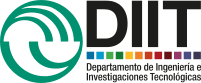](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

# Problem

Calculate the tension in the string using Lagrange multipliers.
The constraint is given by the bead being at $\vec{r} = \ell \hat{\rho}$, ergo, the function that express this is $f(\rho) = \rho - \ell = 0$.

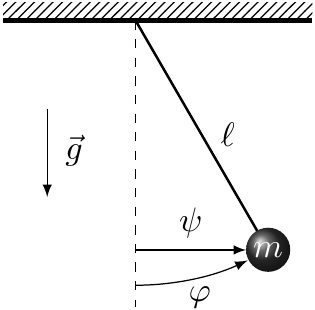

## Variables

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
# Physical parameters
m, g, l = sm.symbols('m, g, \ell', positive=True)
t = sm.symbols('t') # time

# Generalized coordinates
phi, rho = me.dynamicsymbols('phi, rho')
phi, rho

## Position

In [3]:
# Cartesian frame of reference
e = sm.physics.vector.ReferenceFrame('e') 

# position
m_r = rho* (sm.cos(phi)* (-e.y) + sm.sin(phi)* (e.x)) #y is directed upward

## Constraints

In [4]:
lambda1 = sm.symbols('lambda_1') # As many lambdas as constraints
f1 = sm.Eq(sm.Function('f_1')(rho), rho- l)
f1

## Kinetic energy

In [5]:
def kineticEnergyParticle(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Product of Sympy symbols (sympy.core.mul.Mul)
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sm.Rational(1,2) # Rational: a quotient of integers
    return oneHalf*mass*velocity.dot(velocity)

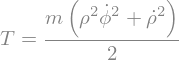

In [6]:
# Kinetic energy of the system
m_T = kineticEnergyParticle(m, m_r, e)
T = sm.Eq(sm.Symbol('T'), m_T ).simplify()
T

## Potential energy

In [7]:
def gravitationalPotentialEnergy(mass, position, accelerationDueToGravity):
    """
    It returns the gravitational potential energy of a particle of mass m whose position r is given in a frame of reference in which g is the Earth's gravitational acceleration.
    
    Parameters
    ----------
    accelerationDueToGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the particle
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to accelerationDueToGravity
    
    Returns
    -------
    sympy.core.mul.Mul
        Gravitational potential energy = - (m \vec{g}) \cdot{r}
    """
    return - (mass * accelerationDueToGravity).dot(position)

In [8]:
# Gravitational potential energy
g_vector = g* (-e.y) # acceleration due to gravity on the -y axis
m_V = gravitationalPotentialEnergy(m, m_r, g_vector)
V = sm.Eq(sm.Symbol('V'), m_V ).simplify()
V

## Lagrangian and Euler-Lagrange equations

To show how to find the Euler-Lagrange equation including the constraint force
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L}
= \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j,
$$
this time each term and the required Lagrangian will be calculated manually. Afterwards, we will keep working with functions that automate this process.

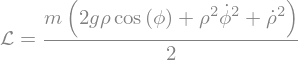

In [9]:
L = sm.Eq(sm.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify())
L

Generalized forces consequence of a potential:
$$
\frac{\partial}{\partial q_i} \mathcal{L} .
$$

In [10]:
phi_dq = L.rhs.diff(phi)
rho_dq = L.rhs.diff(rho)

The term that looks like mass times acceleration, the derivative of each $p_i$ with respect to time:

$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} .
$$

In [11]:
phi_dtdp = L.rhs.diff(phi.diff(t)).diff(t)
rho_dtdp = L.rhs.diff(rho.diff(t)).diff(t)

Generalized constraint forces:

$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j .
$$

In [12]:
phi_Q = lambda1* f1.rhs.diff(phi)
rho_Q = lambda1* f1.rhs.diff(rho)

Merging these results, we can write the Euler-Lagrange equations that include the constraint forces.

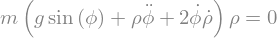

In [13]:
phi_EL = sm.Eq(phi_dtdp - phi_dq, phi_Q) # equation set equal to zero
phi_EL.simplify()

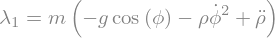

In [14]:
rho_EL = sm.Eq(rho_dtdp - rho_dq, rho_Q) # equation set equal to zero
rho_EL.simplify()

### Using functions

First, the equations without the constraint forces are calculated
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}} \mathcal{L} 
- \frac{\partial}{\partial q} \mathcal{L} 
= 0
$$

In [15]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sm.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

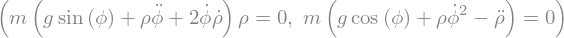

In [16]:
phi_EL = eulerLagrange(T, V, phi)
rho_EL = eulerLagrange(T, V, rho)
phi_EL, rho_EL

Then we add the terms with the constraint forces
$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j ,
$$
using a negative sign because of the order given to the terms in the Euler-Lagrange equations.

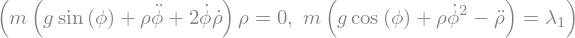

In [17]:
phi_EL = sm.Eq(phi_EL.lhs, phi_Q)
rho_EL = sm.Eq(rho_EL.lhs, rho_Q)
phi_EL, rho_EL

## Applying the constraint function

At the Euler-Langrange equations, the radial coordinate, $\rho$, is substituted by a constant rope length, $\ell$, as its considered as inextensible.

In [18]:
rho_f1 = sm.solve(f1.rhs, rho)[0]
sm.Eq(rho, rho_f1)

And due $\ell$ is a constant, the time derivative of the radial coordinate, $\dot{\rho}$, is null.
The same applies to the second time derivative of the radial coordinate, $\ddot{\rho}$.

In [19]:
sm.Eq(f1.rhs.diff(t), 0)

In [20]:
sm.Eq(f1.rhs.diff(t,2), 0)

These are substituted in the Euler-Lagrange equations.

In [21]:
f1_subs = {
    rho : rho_f1,
    rho.diff(t): rho_f1.diff(t),
    rho.diff(t,2): rho_f1.diff(t,2)
}

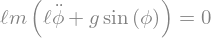

In [22]:
phi_EL_subs = phi_EL.subs(f1_subs).simplify()
phi_EL_subs

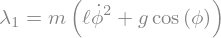

In [23]:
rho_EL_subs = rho_EL.subs(f1_subs).simplify()
rho_EL_subs

The equations for the dynamics of $\varphi$ is obtained from the first one:

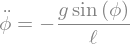

In [24]:
phi_pp = sm.solve(phi_EL_subs, phi.diff(t,2) )[0]
sm.Eq(phi.diff(t,2), phi_pp)

From the second one, a function for $\lambda_1$ is obtained:

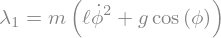

In [26]:
lambda1_function = sm.solve(rho_EL_subs, lambda1 )[0]
sm.Eq(lambda1, lambda1_function)

Since in this case

$$
Q_\rho= \lambda_1(t) \frac{\partial}{\partial \rho} f_1 = \lambda_1(t),
$$
the expression for the constraint force exerted by the string, that is, the tension, is:

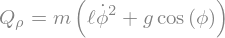

In [27]:
sm.Eq(sm.Symbol('Q_rho'), lambda1_function)